In [6]:
from azureml.core.workspace import Workspace

In [2]:
subscription_id = "d5ab9057-4f5b-4b80-bc31-ca460dfd5ea4"

resource_group = "Automl"

workspace_region = "southeastasia"

workspace_name = "ighkworkspace_02"

ws = Workspace.create(name = workspace_name,

subscription_id = subscription_id,

resource_group = resource_group,

location = workspace_region)

ws.get_details()

ws = Workspace(workspace_name = workspace_name,

subscription_id = subscription_id,

resource_group = resource_group)

# write the details of the workspace to a configuration file to the notebook library

ws.write_config()

from azureml.core.compute import ComputeTarget, AmlCompute

from azureml.core.compute_target import ComputeTargetException

# Choose a name for your CPU cluster

cpu_cluster_name = "cpucluster"

# Verify that cluster does not exist already

try:

    cpu_cluster = ComputeTarget(workspace=ws, name=cpu_cluster_name)

    print("Found existing cpucluster")

except ComputeTargetException:

    print("Creating new cpucluster")

# Specify the configuration for the new cluster

compute_config = AmlCompute.provisioning_configuration(vm_size="STANDARD_D2_V2",

min_nodes=0,

max_nodes=4)

# Create the cluster with the specified name and configuration

cpu_cluster = ComputeTarget.create(ws, cpu_cluster_name, compute_config)

# Wait for the cluster to complete, show the output log

cpu_cluster.wait_for_completion(show_output=True)

ws = Workspace.from_config()

Deploying KeyVault with name ighkworkkeyvault23bceea9.
Deploying StorageAccount with name ighkworkstorageb300b96d9.
Deploying AppInsights with name ighkworkinsightsc2240492.
Deployed AppInsights with name ighkworkinsightsc2240492.
Deploying ContainerRegistry with name ighkworkacrc21a5075d58b4.
Deployed ContainerRegistry with name ighkworkacrc21a5075d58b4.
Deployed KeyVault with name ighkworkkeyvault23bceea9.
Deployed StorageAccount with name ighkworkstorageb300b96d9.
Deploying Workspace with name ighkworkspace_02.
Deployed Workspace with name ighkworkspace_02.
Creating new cpucluster
Creating
Succeeded
AmlCompute wait for completion finished
Minimum number of nodes requested have been provisioned


In [3]:
pip install "azureml-dataprep[pandas]>=1.1.0,<1.2.0"


The following command must be run outside of the IPython shell:

    $ pip install "azureml-dataprep[pandas]>=1.1.0,<1.2.0"

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
import azureml.dataprep as dprep

In [5]:
from IPython.display import display
dataset_root = "https://dprepdata.blob.core.windows.net/demo"

green_path = "/".join([dataset_root, "green-small/*"])
yellow_path = "/".join([dataset_root, "yellow-small/*"])

green_df_raw = dprep.read_csv(path=green_path, header=dprep.PromoteHeadersMode.GROUPED)
# auto_read_file automatically identifies and parses the file type, which is useful when you don't know the file type.
yellow_df_raw = dprep.auto_read_file(path=yellow_path)

display(green_df_raw.head(5))
display(yellow_df_raw.head(5))

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Column21,Column22
0,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,2013-08-01 08:14:37,2013-08-01 09:09:06,N,1,0,0,0,0,1,...,0,0,0,0,,21.25,2,,,
2,2,2013-08-01 09:13:00,2013-08-01 11:38:00,N,1,0,0,0,0,2,...,0,0.5,0,0,,75,2,,,
3,2,2013-08-01 09:48:00,2013-08-01 09:49:00,N,5,0,0,0,0,1,...,0.1,0,0,1,,2.1,2,,,
4,2,2013-08-01 10:38:35,2013-08-01 10:38:51,N,1,0,0,0,0,1,...,0,0,0,0,,3.25,2,,,


,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.6299999999999999,-73.991956999999999,40.721567,,,-73.993803,40.695922000000003,CASH,8.9000000000000004,0.5,,0,0,9.4000000000000004
2,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.5499999999999998,-73.982101999999998,40.736289999999997,,,-73.955849999999998,40.768030000000003,Credit,12.1,0.5,,2,0,14.6
3,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587000000005,40.739747999999999,,,-73.869983000000005,40.770225000000003,Credit,23.699999999999999,0,,4.7400000000000002,0,28.440000000000001
4,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5,-73.974266999999998,40.790954999999997,,,-73.996557999999993,40.731848999999997,CREDIT,14.9,0.5,,3.0499999999999998,0,18.449999999999999


In [6]:
all_columns = dprep.ColumnSelector(term=".*", use_regex=True)
drop_if_all_null = [all_columns, dprep.ColumnRelationship(dprep.ColumnRelationship.ALL)]
useful_columns = [
    "cost", "distance", "dropoff_datetime", "dropoff_latitude", "dropoff_longitude",
    "passengers", "pickup_datetime", "pickup_latitude", "pickup_longitude", "store_forward", "vendor"
]

In [7]:
green_df = (green_df_raw
    .replace_na(columns=all_columns)
    .drop_nulls(*drop_if_all_null)
    .rename_columns(column_pairs={
        "VendorID": "vendor",
        "lpep_pickup_datetime": "pickup_datetime",
        "Lpep_dropoff_datetime": "dropoff_datetime",
        "lpep_dropoff_datetime": "dropoff_datetime",
        "Store_and_fwd_flag": "store_forward",
        "store_and_fwd_flag": "store_forward",
        "Pickup_longitude": "pickup_longitude",
        "Pickup_latitude": "pickup_latitude",
        "Dropoff_longitude": "dropoff_longitude",
        "Dropoff_latitude": "dropoff_latitude",
        "Passenger_count": "passengers",
        "Fare_amount": "cost",
        "Trip_distance": "distance"
     })
    .keep_columns(columns=useful_columns))
green_df.head(5)

,vendor,pickup_datetime,dropoff_datetime,store_forward,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passengers,distance,cost
0,2,2013-08-01 08:14:37,2013-08-01 09:09:06,N,0,0,0,0,1,.00,21.25
1,2,2013-08-01 09:13:00,2013-08-01 11:38:00,N,0,0,0,0,2,.00,74.5
2,2,2013-08-01 09:48:00,2013-08-01 09:49:00,N,0,0,0,0,1,.00,1
3,2,2013-08-01 10:38:35,2013-08-01 10:38:51,N,0,0,0,0,1,.00,3.25
4,2,2013-08-01 11:51:45,2013-08-01 12:03:52,N,0,0,0,0,1,.00,8.5


In [8]:
yellow_df = (yellow_df_raw
    .replace_na(columns=all_columns)
    .drop_nulls(*drop_if_all_null)
    .rename_columns(column_pairs={
        "vendor_name": "vendor",
        "VendorID": "vendor",
        "vendor_id": "vendor",
        "Trip_Pickup_DateTime": "pickup_datetime",
        "tpep_pickup_datetime": "pickup_datetime",
        "Trip_Dropoff_DateTime": "dropoff_datetime",
        "tpep_dropoff_datetime": "dropoff_datetime",
        "store_and_forward": "store_forward",
        "store_and_fwd_flag": "store_forward",
        "Start_Lon": "pickup_longitude",
        "Start_Lat": "pickup_latitude",
        "End_Lon": "dropoff_longitude",
        "End_Lat": "dropoff_latitude",
        "Passenger_Count": "passengers",
        "passenger_count": "passengers",
        "Fare_Amt": "cost",
        "fare_amount": "cost",
        "Trip_Distance": "distance",
        "trip_distance": "distance"
    })
    .keep_columns(columns=useful_columns))
yellow_df.head(5)

,vendor,pickup_datetime,dropoff_datetime,passengers,distance,pickup_longitude,pickup_latitude,store_forward,dropoff_longitude,dropoff_latitude,cost
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.6299999999999999,-73.991956999999999,40.721567,None,-73.993803,40.695922000000003,8.9000000000000004
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.5499999999999998,-73.982101999999998,40.736289999999997,None,-73.955849999999998,40.768030000000003,12.1
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587000000005,40.739747999999999,None,-73.869983000000005,40.770225000000003,23.699999999999999
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5,-73.974266999999998,40.790954999999997,None,-73.996557999999993,40.731848999999997,14.9
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40000000000000002,-74.001580000000004,40.719382000000003,None,-74.008377999999993,40.720350000000003,3.7000000000000002


In [9]:
combined_df = green_df.append_rows([yellow_df])

In [10]:
decimal_type = dprep.TypeConverter(data_type=dprep.FieldType.DECIMAL)
combined_df = combined_df.set_column_types(type_conversions={
    "pickup_longitude": decimal_type,
    "pickup_latitude": decimal_type,
    "dropoff_longitude": decimal_type,
    "dropoff_latitude": decimal_type
})
combined_df.keep_columns(columns=[
    "pickup_longitude", "pickup_latitude",
    "dropoff_longitude", "dropoff_latitude"
]).get_profile()

,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent Missing,Error Count,Empty Count,Unique Values,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
pickup_longitude,FieldType.DECIMAL,-115.179337,0.000000,7722.0,0.0,7722.0,0.0,0.0,0.0,,-80.110658,-73.961885,-73.962354,-73.947823,-73.921860,-73.846196,0.000000,0.000000,0.000000,-68.833579,18.792672,353.164515,3.369970,9.475822
pickup_latitude,FieldType.DECIMAL,0.000000,40.919121,7722.0,0.0,7722.0,0.0,0.0,0.0,,0.000000,40.684513,40.683247,40.721145,40.756218,40.804345,40.849468,40.870242,40.892072,37.936742,10.345967,107.039038,-3.391034,9.507615
dropoff_longitude,FieldType.DECIMAL,-115.179337,0.000000,7722.0,0.0,7722.0,0.0,0.0,0.0,,-80.091993,-73.984740,-73.985831,-73.956148,-73.928934,-73.866010,0.000000,0.000000,0.000000,-68.896978,18.696526,349.560067,3.393537,9.637675
dropoff_latitude,FieldType.DECIMAL,0.000000,41.008934,7722.0,0.0,7722.0,0.0,0.0,0.0,,0.000000,40.663088,40.661844,40.718004,40.756568,40.784694,40.852264,40.879800,40.925400,37.963774,10.290780,105.900157,-3.414918,9.670386


In [11]:
latlong_filtered_df = (combined_df
    .drop_nulls(
        columns=["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"],
        column_relationship=dprep.ColumnRelationship(dprep.ColumnRelationship.ANY)
    )
    .filter(dprep.f_and(
        dprep.col("pickup_longitude") <= -73.72,
        dprep.col("pickup_longitude") >= -74.09,
        dprep.col("pickup_latitude") <= 40.88,
        dprep.col("pickup_latitude") >= 40.53,
        dprep.col("dropoff_longitude") <= -73.72,
        dprep.col("dropoff_longitude") >= -74.09,
        dprep.col("dropoff_latitude") <= 40.88,
        dprep.col("dropoff_latitude") >= 40.53
    )))
latlong_filtered_df.keep_columns(columns=[
    "pickup_longitude", "pickup_latitude",
    "dropoff_longitude", "dropoff_latitude"
]).get_profile()

,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent Missing,Error Count,Empty Count,Unique Values,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
pickup_longitude,FieldType.DECIMAL,-74.078156,-73.736481,7059.0,0.0,7059.0,0.0,0.0,0.0,,-74.078006,-73.962538,-73.962717,-73.948994,-73.927816,-73.865688,-73.830361,-73.824080,-73.769338,-73.913865,0.048711,0.002373,0.402697,-0.613516
pickup_latitude,FieldType.DECIMAL,40.575485,40.879852,7059.0,0.0,7059.0,0.0,0.0,0.0,,40.633259,40.713189,40.713110,40.721369,40.758147,40.805117,40.848848,40.867566,40.877787,40.765226,0.048348,0.002338,0.228088,-0.598862
dropoff_longitude,FieldType.DECIMAL,-74.085747,-73.720871,7059.0,0.0,7059.0,0.0,0.0,0.0,,-74.078187,-73.985679,-73.986376,-73.959024,-73.936762,-73.884944,-73.815567,-73.776707,-73.733476,-73.920718,0.055961,0.003132,0.648649,0.022914
dropoff_latitude,FieldType.DECIMAL,40.583530,40.879734,7059.0,0.0,7059.0,0.0,0.0,0.0,,40.600361,40.695508,40.693780,40.727604,40.758163,40.788390,40.850519,40.867857,40.878703,40.759487,0.050462,0.002546,0.048418,-0.036880


In [12]:
latlong_filtered_df.keep_columns(columns='store_forward').get_profile()

,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent Missing,Error Count,Empty Count,Unique Values,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
store_forward,FieldType.STRING,N,Y,7059.0,99.0,6960.0,0.014025,0.0,0.0,3,,,,,,,,,,,,,,


In [13]:
replaced_stfor_vals_df = latlong_filtered_df.replace(columns="store_forward", find="0", replace_with="N").fill_nulls("store_forward", "N")

In [14]:
replaced_distance_vals_df = replaced_stfor_vals_df.replace(columns="distance", find=".00", replace_with=0).fill_nulls("distance", 0)
replaced_distance_vals_df = replaced_distance_vals_df.to_number(["distance"])

In [15]:
time_split_df = (replaced_distance_vals_df
    .split_column_by_example(source_column="pickup_datetime")
    .split_column_by_example(source_column="dropoff_datetime"))
time_split_df.head(5)

,vendor,pickup_datetime,pickup_datetime_1,pickup_datetime_2,dropoff_datetime,dropoff_datetime_1,dropoff_datetime_2,store_forward,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passengers,distance,cost
0,2,2013-08-01 17:22:00,2013-08-01,17:22:00,2013-08-01 17:22:00,2013-08-01,17:22:00,N,-73.937767,40.758480,-73.937767,40.758480,1,0.0,2.5
1,2,2013-08-01 17:24:00,2013-08-01,17:24:00,2013-08-01 17:25:00,2013-08-01,17:25:00,N,-73.937927,40.757843,-73.937927,40.757843,1,0.0,2.5
2,2,2013-08-06 06:51:19,2013-08-06,06:51:19,2013-08-06 06:51:36,2013-08-06,06:51:36,N,-73.937721,40.758404,-73.937721,40.758369,1,0.0,3.3
3,2,2013-08-06 13:26:34,2013-08-06,13:26:34,2013-08-06 13:26:57,2013-08-06,13:26:57,N,-73.937691,40.758419,-73.937790,40.758358,1,0.0,3.3
4,2,2013-08-06 13:27:53,2013-08-06,13:27:53,2013-08-06 13:28:08,2013-08-06,13:28:08,N,-73.937805,40.758396,-73.937775,40.758450,1,0.0,3.3


In [16]:
renamed_col_df = (time_split_df
    .rename_columns(column_pairs={
        "pickup_datetime_1": "pickup_date",
        "pickup_datetime_2": "pickup_time",
        "dropoff_datetime_1": "dropoff_date",
        "dropoff_datetime_2": "dropoff_time"
    }))
renamed_col_df.head(5)

,vendor,pickup_datetime,pickup_date,pickup_time,dropoff_datetime,dropoff_date,dropoff_time,store_forward,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passengers,distance,cost
0,2,2013-08-01 17:22:00,2013-08-01,17:22:00,2013-08-01 17:22:00,2013-08-01,17:22:00,N,-73.937767,40.758480,-73.937767,40.758480,1,0.0,2.5
1,2,2013-08-01 17:24:00,2013-08-01,17:24:00,2013-08-01 17:25:00,2013-08-01,17:25:00,N,-73.937927,40.757843,-73.937927,40.757843,1,0.0,2.5
2,2,2013-08-06 06:51:19,2013-08-06,06:51:19,2013-08-06 06:51:36,2013-08-06,06:51:36,N,-73.937721,40.758404,-73.937721,40.758369,1,0.0,3.3
3,2,2013-08-06 13:26:34,2013-08-06,13:26:34,2013-08-06 13:26:57,2013-08-06,13:26:57,N,-73.937691,40.758419,-73.937790,40.758358,1,0.0,3.3
4,2,2013-08-06 13:27:53,2013-08-06,13:27:53,2013-08-06 13:28:08,2013-08-06,13:28:08,N,-73.937805,40.758396,-73.937775,40.758450,1,0.0,3.3


In [17]:
renamed_col_df.get_profile()

,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent Missing,Error Count,Empty Count,Unique Values,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
vendor,FieldType.STRING,1,VTS,7059.0,0.0,7059.0,0.0,0.0,0.0,5,,,,,,,,,,,,,,
pickup_datetime,FieldType.STRING,2009-01-01 20:52:58,2013-08-31 23:59:14,7059.0,0.0,7059.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
pickup_date,FieldType.STRING,2009-01-01,2013-08-31,7059.0,0.0,7059.0,0.0,0.0,0.0,41,,,,,,,,,,,,,,
pickup_time,FieldType.STRING,00:00:48,23:59:48,7059.0,0.0,7059.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
dropoff_datetime,FieldType.STRING,2009-01-01 21:14:00,2013-09-01 00:25:07,7059.0,0.0,7059.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
dropoff_date,FieldType.STRING,2009-01-01,2013-09-01,7059.0,0.0,7059.0,0.0,0.0,0.0,42,,,,,,,,,,,,,,
dropoff_time,FieldType.STRING,00:00:00,23:59:45,7059.0,0.0,7059.0,0.0,0.0,0.0,,,,,,,,,,,,,,,
store_forward,FieldType.STRING,N,Y,7059.0,0.0,7059.0,0.0,0.0,0.0,2,,,,,,,,,,,,,,
pickup_longitude,FieldType.DECIMAL,-74.0782,-73.7365,7059.0,0.0,7059.0,0.0,0.0,0.0,,-74.078,-73.9625,-73.9627,-73.949,-73.9278,-73.8657,-73.8304,-73.8241,-73.7693,-73.9139,0.0487111,0.00237277,0.402697,-0.613516
pickup_latitude,FieldType.DECIMAL,40.5755,40.8799,7059.0,0.0,7059.0,0.0,0.0,0.0,,40.6333,40.7132,40.7131,40.7214,40.7581,40.8051,40.8488,40.8676,40.8778,40.7652,0.0483485,0.00233758,0.228088,-0.598862


In [18]:
transformed_features_df = (renamed_col_df
    .derive_column_by_example(
        source_columns="pickup_date",
        new_column_name="pickup_weekday",
        example_data=[("2009-01-04", "Sunday"), ("2013-08-22", "Thursday")]
    )
    .derive_column_by_example(
        source_columns="dropoff_date",
        new_column_name="dropoff_weekday",
        example_data=[("2013-08-22", "Thursday"), ("2013-11-03", "Sunday")]
    )

    .split_column_by_example(source_column="pickup_time")
    .split_column_by_example(source_column="dropoff_time")
    # The following two calls to split_column_by_example reference the column names generated from the previous two calls.
    .split_column_by_example(source_column="pickup_time_1")
    .split_column_by_example(source_column="dropoff_time_1")
    .drop_columns(columns=[
        "pickup_date", "pickup_time", "dropoff_date", "dropoff_time",
        "pickup_date_1", "dropoff_date_1", "pickup_time_1", "dropoff_time_1"
    ])

    .rename_columns(column_pairs={
        "pickup_date_2": "pickup_month",
        "pickup_date_3": "pickup_monthday",
        "pickup_time_1_1": "pickup_hour",
        "pickup_time_1_2": "pickup_minute",
        "pickup_time_2": "pickup_second",
        "dropoff_date_2": "dropoff_month",
        "dropoff_date_3": "dropoff_monthday",
        "dropoff_time_1_1": "dropoff_hour",
        "dropoff_time_1_2": "dropoff_minute",
        "dropoff_time_2": "dropoff_second"
    }))

transformed_features_df.head(5)

,vendor,pickup_datetime,pickup_weekday,pickup_hour,pickup_minute,pickup_second,dropoff_datetime,dropoff_weekday,dropoff_hour,dropoff_minute,dropoff_second,store_forward,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passengers,distance,cost
0,2,2013-08-01 17:22:00,Thursday,17,22,00,2013-08-01 17:22:00,Thursday,17,22,00,N,-73.937767,40.758480,-73.937767,40.758480,1,0.0,2.5
1,2,2013-08-01 17:24:00,Thursday,17,24,00,2013-08-01 17:25:00,Thursday,17,25,00,N,-73.937927,40.757843,-73.937927,40.757843,1,0.0,2.5
2,2,2013-08-06 06:51:19,Tuesday,06,51,19,2013-08-06 06:51:36,Tuesday,06,51,36,N,-73.937721,40.758404,-73.937721,40.758369,1,0.0,3.3
3,2,2013-08-06 13:26:34,Tuesday,13,26,34,2013-08-06 13:26:57,Tuesday,13,26,57,N,-73.937691,40.758419,-73.937790,40.758358,1,0.0,3.3
4,2,2013-08-06 13:27:53,Tuesday,13,27,53,2013-08-06 13:28:08,Tuesday,13,28,08,N,-73.937805,40.758396,-73.937775,40.758450,1,0.0,3.3


In [19]:
processed_df = transformed_features_df.drop_columns(columns=["pickup_datetime", "dropoff_datetime"])

In [20]:
type_infer = processed_df.builders.set_column_types()
type_infer.learn()
type_infer

Column types conversion candidates:
'pickup_weekday': [FieldType.STRING],
'dropoff_hour': [FieldType.INTEGER],
'dropoff_minute': [FieldType.INTEGER],
'dropoff_second': [FieldType.INTEGER],
'store_forward': [FieldType.BOOLEAN],
'vendor': [FieldType.STRING],
'pickup_hour': [FieldType.INTEGER],
'pickup_minute': [FieldType.INTEGER],
'pickup_second': [FieldType.INTEGER],
'dropoff_weekday': [FieldType.STRING],
'pickup_longitude': [FieldType.DECIMAL],
'pickup_latitude': [FieldType.DECIMAL],
'dropoff_longitude': [FieldType.DECIMAL],
'dropoff_latitude': [FieldType.DECIMAL],
'passengers': [FieldType.INTEGER],
'distance': [FieldType.DECIMAL],
'cost': [FieldType.DECIMAL]

In [21]:
type_converted_df = type_infer.to_dataflow()
type_converted_df.get_profile()

,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent Missing,Error Count,Empty Count,Unique Values,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
vendor,FieldType.STRING,1,VTS,7059.0,0.0,7059.0,0.0,0.0,0.0,5,,,,,,,,,,,,,,
pickup_weekday,FieldType.STRING,Friday,Wednesday,7059.0,0.0,7059.0,0.0,0.0,0.0,7,,,,,,,,,,,,,,
pickup_hour,FieldType.INTEGER,0,23,7059.0,0.0,7059.0,0.0,0.0,0.0,24,0,3.7504,3,10,16,19,22.1376,23,23,14.2326,6.34926,40.3131,-0.693335,-0.459336
pickup_minute,FieldType.INTEGER,0,59,7059.0,0.0,7059.0,0.0,0.0,0.0,60,0,5,5,14,29.4903,44.8062,56.7184,59,59,29.4635,17.4396,304.14,0.00440324,-1.20458
pickup_second,FieldType.INTEGER,0,59,7059.0,0.0,7059.0,0.0,0.0,0.0,60,0,5.02995,5,14.7086,29.9385,44.5977,56.9191,59,59,29.6225,17.3868,302.302,-0.0227466,-1.19409
dropoff_weekday,FieldType.STRING,Friday,Wednesday,7059.0,0.0,7059.0,0.0,0.0,0.0,7,,,,,,,,,,,,,,
dropoff_hour,FieldType.INTEGER,0,23,7059.0,0.0,7059.0,0.0,0.0,0.0,24,0,3,3,10,16,19,22.0764,23,23,14.1815,6.45578,41.677,-0.691001,-0.500215
dropoff_minute,FieldType.INTEGER,0,59,7059.0,0.0,7059.0,0.0,0.0,0.0,60,0,5.14087,5,14,28.9957,44.0043,56.8986,59,59,29.353,17.4241,303.598,0.0142562,-1.21531
dropoff_second,FieldType.INTEGER,0,59,7059.0,0.0,7059.0,0.0,0.0,0.0,60,0,5,5,14.8268,29.6546,45.2547,56,59,59,29.7923,17.481,305.585,-0.0281313,-1.21965
store_forward,FieldType.BOOLEAN,False,True,7059.0,0.0,7059.0,0.0,0.0,0.0,2,,,,,,,,,,,,,,


In [22]:
final_df = type_converted_df.filter(dprep.col("distance") > 0)
final_df = final_df.filter(dprep.col("cost") > 0)

In [23]:
import os

file_path = os.path.join(os.getcwd(), "dflows.dprep")
final_df.save(file_path)

In [2]:
import azureml.core
import pandas as pd
from azureml.core.workspace import Workspace
import logging
import os

In [3]:
ws = Workspace.from_config()
# choose a name for the run history container in the workspace
experiment_name = 'automated-ml-regression'
# project folder
project_folder = './automated-ml-regression'

output = {}
output['SDK version'] = azureml.core.VERSION
output['Subscription ID'] = ws.subscription_id
output['Workspace'] = ws.name
output['Resource Group'] = ws.resource_group
output['Location'] = ws.location
output['Project Directory'] = project_folder
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(data=output, index=['']).T

,
Location,southeastasia
Project Directory,./automated-ml-regression
Resource Group,Automl
SDK version,1.0.30
Subscription ID,d5ab9057-4f5b-4b80-bc31-ca460dfd5ea4
Workspace,ighkworkspace_02


In [4]:
import azureml.dataprep as dprep

file_path = os.path.join(os.getcwd(), "dflows.dprep")

dflow_prepared = dprep.Dataflow.open(file_path)
dflow_prepared.get_profile()

,Type,Min,Max,Count,Missing Count,Not Missing Count,Percent Missing,Error Count,Empty Count,Unique Values,0.1% Quantile,1% Quantile,5% Quantile,25% Quantile,50% Quantile,75% Quantile,95% Quantile,99% Quantile,99.9% Quantile,Mean,Standard Deviation,Variance,Skewness,Kurtosis
vendor,FieldType.STRING,1,VTS,6148.0,0.0,6148.0,0.0,0.0,0.0,5,,,,,,,,,,,,,,
pickup_weekday,FieldType.STRING,Friday,Wednesday,6148.0,0.0,6148.0,0.0,0.0,0.0,7,,,,,,,,,,,,,,
pickup_hour,FieldType.INTEGER,0,23,6148.0,0.0,6148.0,0.0,0.0,0.0,24,0,3,3,9.86524,16,19.4021,22.8728,23,23,14.2731,6.59242,43.46,-0.693723,-0.570403
pickup_minute,FieldType.INTEGER,0,59,6148.0,0.0,6148.0,0.0,0.0,0.0,60,0,5.15228,5,13.9968,29.3438,44.8825,56.6344,59,59,29.427,17.4333,303.921,0.0120999,-1.20981
pickup_second,FieldType.INTEGER,0,59,6148.0,0.0,6148.0,0.0,0.0,0.0,60,0,5.43206,5,14.8605,29.9765,44.9634,56.9584,59,59,29.7443,17.3595,301.351,-0.0252399,-1.19616
dropoff_weekday,FieldType.STRING,Friday,Wednesday,6148.0,0.0,6148.0,0.0,0.0,0.0,7,,,,,,,,,,,,,,
dropoff_hour,FieldType.INTEGER,0,23,6148.0,0.0,6148.0,0.0,0.0,0.0,24,0,2.49493,2,9.65682,16,19.75,22.9283,23,23,14.2105,6.71093,45.0365,-0.687292,-0.61951
dropoff_minute,FieldType.INTEGER,0,59,6148.0,0.0,6148.0,0.0,0.0,0.0,60,0,5.42889,5,14.114,28.8704,43.999,56.8578,59,59,29.2907,17.4108,303.136,0.0222514,-1.2181
dropoff_second,FieldType.INTEGER,0,59,6148.0,0.0,6148.0,0.0,0.0,0.0,60,0,5,5,14.6666,29.576,45.3584,56.3479,59,59,29.772,17.5337,307.429,-0.0212575,-1.226
store_forward,FieldType.BOOLEAN,False,True,6148.0,0.0,6148.0,0.0,0.0,0.0,2,,,,,,,,,,,,,,


In [5]:
dflow_X = dflow_prepared.keep_columns(['pickup_weekday','pickup_hour', 'distance','passengers', 'vendor'])
dflow_y = dflow_prepared.keep_columns('cost')

In [6]:
from sklearn.model_selection import train_test_split

x_df = dflow_X.to_pandas_dataframe()
y_df = dflow_y.to_pandas_dataframe()

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=223)
# flatten y_train to 1d array
y_train.values.flatten()

array([26. ,  6.5, 15.5, ..., 24.5, 11. , 33.5])

In [7]:
automl_settings = {
    "iteration_timeout_minutes" : 10,
    "iterations" : 10,
    "primary_metric" : 'spearman_correlation',
    "preprocess" : True,
    "verbosity" : logging.INFO,
    "n_cross_validations": 5
}

In [8]:
from azureml.train.automl import AutoMLConfig

In [33]:
!pip install --upgrade --ignore-installed tensorflow

     |████████████████████████████████| 92.5MB 12kB/s s eta 0:00:01    |████████████                    | 34.4MB 3.3MB/s eta 0:00:18     |█████████████▍                  | 38.8MB 1.1MB/s eta 0:00:49     |████████████████████▎           | 58.6MB 7.5MB/s eta 0:00:05     |████████████████████▋           | 59.6MB 7.5MB/s eta 0:00:05     |██████████████████████████▌     | 76.7MB 1.1MB/s eta 0:00:15
     |████████████████████████████████| 2.2MB 23.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/96/ba/a4702cbb6a3a485239fbe9525443446203f00771af9ac000fa3ef2788201/wheel-0.33.1-py2.py3-none-any.whl
     |████████████████████████████████| 3.2MB 21.5MB/s eta 0:00:01
     |████████████████████████████████| 61kB 15.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 14.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
     |█████████████████████

In [9]:
from azureml.train.automl import AutoMLConfig

# local compute
automated_ml_config = AutoMLConfig(task = 'regression',
                             debug_log = 'automated_ml_errors.log',
                             path = project_folder,
                             X = x_train.values,
                             y = y_train.values.flatten(),
                             **automl_settings)

In [10]:
from azureml.core.experiment import Experiment
experiment=Experiment(ws, experiment_name)
local_run = experiment.submit(automated_ml_config, show_output=True)

Running on local machine
Parent Run ID: AutoML_15d2774e-efe1-40a5-85dc-c4a5681d47c6
Current status: DatasetEvaluation. Gathering dataset statistics.
Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturization. Featurizing the dataset.
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.
Current status: DatasetFeaturization. Featurizing the dataset.
Current status: DatasetFeaturization. Featurizing the dataset.
Current status: DatasetFeaturization. Featurizing the dataset.
Current status: DatasetFeaturization. Featurizing the dataset.
Current status: DatasetFeaturization. Featurizing the dataset.
Current status: DatasetFeaturization. Featurizing the dataset.
Current status: DatasetFeaturization. Featurizing the dataset.
Current status: DatasetFeaturization. Featurizing the dataset.
Current status: DatasetFeaturization. Featurizing the dataset.
Current status: DatasetFeaturization. Featurizing the dat

In [11]:
from azureml.widgets import RunDetails
RunDetails(local_run).show()

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', 's…

In [17]:
children = list(local_run.get_children())
metricslist = {}
for run in children:
    properties = run.get_properties()
    metrics = {k: v for k, v in run.get_metrics().items() if isinstance(v, float)}
    metricslist[int(properties['iteration'])] = metrics

rundata = pd.DataFrame(metricslist).sort_index(1)
rundata

,0,1,2,3,4,5,6,7,8,9
explained_variance,0.46,0.86,0.85,0.74,0.57,0.84,0.81,0.85,0.85,0.86
mean_absolute_error,4.85,1.59,1.79,2.50,4.17,1.84,2.14,1.72,1.68,1.60
median_absolute_error,3.77,0.91,1.11,1.28,3.13,1.10,1.33,0.92,1.01,0.95
normalized_mean_absolute_error,0.06,0.02,0.02,0.03,0.05,0.02,0.02,0.02,0.02,0.02
normalized_median_absolute_error,0.04,0.01,0.01,0.02,0.04,0.01,0.02,0.01,0.01,0.01
normalized_root_mean_squared_error,0.08,0.04,0.04,0.06,0.07,0.04,0.05,0.04,0.04,0.04
normalized_root_mean_squared_log_error,0.14,0.06,0.07,0.07,0.12,0.07,0.08,0.07,0.06,0.06
r2_score,0.46,0.86,0.85,0.74,0.57,0.84,0.81,0.85,0.85,0.86
root_mean_squared_error,7.08,3.59,3.78,4.90,6.32,3.81,4.19,3.73,3.68,3.57
root_mean_squared_log_error,0.45,0.21,0.21,0.24,0.40,0.22,0.25,0.22,0.21,0.21


In [23]:
best_run, fitted_model = local_run.get_output()
print(best_run)
print(fitted_model)

Run(Experiment: automated-ml-regression,
Id: AutoML_15d2774e-efe1-40a5-85dc-c4a5681d47c6_8,
Type: None,
Status: Completed)
RegressionPipeline(pipeline=Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(enable_feature_sweeping=None, feature_sweeping_timeout=None,
        is_onnx_compatible=None, logger=None, observer=None, task=None)), ('prefittedsoftvotingregressor', <azureml.train.automl._vendor.automl.client.core.common.model_wrappers.PreFittedSoftVotingRegressor object at 0x7f858d0b5dd8>)]),
          stddev=None)


In [19]:
y_predict = fitted_model.predict(x_test.values)
print(y_predict[:10])

[ 7.24534113 12.66761357 24.53625868  7.5095553   6.53525597 10.29175159
 17.44329116 17.19578904 10.30292462  7.36297358]


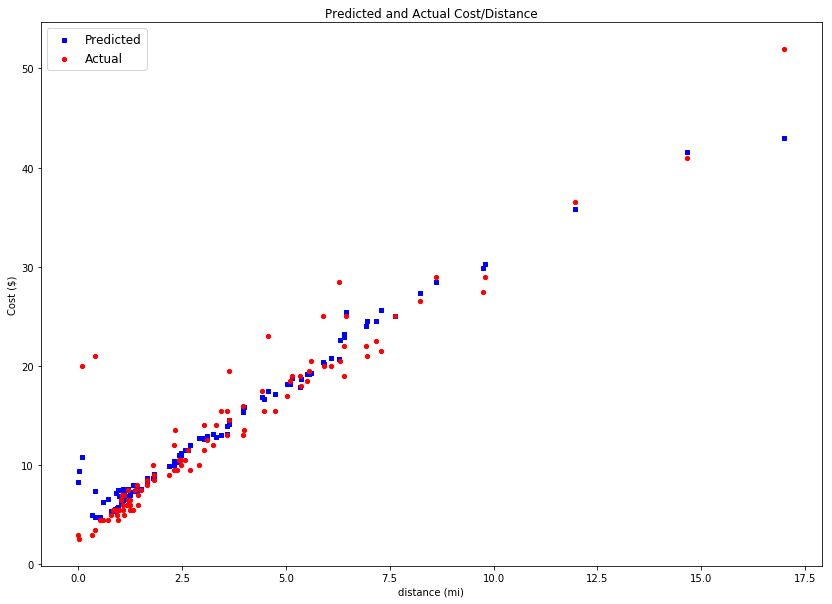

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111)

distance_vals = [x[4] for x in x_test.values]
y_actual = y_test.values.flatten().tolist()

ax1.scatter(distance_vals[:100], y_predict[:100], s=18, c='b', marker="s", label='Predicted')
ax1.scatter(distance_vals[:100], y_actual[:100], s=18, c='r', marker="o", label='Actual')

ax1.set_xlabel('distance (mi)')
ax1.set_title('Predicted and Actual Cost/Distance')
ax1.set_ylabel('Cost ($)')

plt.legend(loc='upper left', prop={'size': 12})
plt.rcParams.update({'font.size': 14})
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_actual, y_predict))
rmse

3.2720662831645946

In [22]:
sum_actuals = sum_errors = 0

for actual_val, predict_val in zip(y_actual, y_predict):
    abs_error = actual_val - predict_val
    if abs_error < 0:
        abs_error = abs_error * -1

    sum_errors = sum_errors + abs_error
    sum_actuals = sum_actuals + actual_val

mean_abs_percent_error = sum_errors / sum_actuals
print("Model MAPE:")
print(mean_abs_percent_error)
print()
print("Model Accuracy:")
print(1 - mean_abs_percent_error)

Model MAPE:
0.12123477403775826

Model Accuracy:
0.8787652259622417
